matplotlib 使用 `Artist` 对象处理点、线、文字、图片等图像要素在绘图区域上展现的细节问题。`Artist` 对象可以分为两种类型：一是基础对象，包括点、线、文字、图片等要素；二是容器对象，包括画布、坐标轴、坐标系等。其中，画布 `Figure` 是最基础的容器对象，是容纳其他一切 `Artist` 对象的基础。

# 如何查看图像

matplotlib 支持通过使用 `%matplotlib <backend>` 魔法指令来指定渲染图形的后端。Jupyter 默认的后端是 `%matplotlib inline` ，在渲染图像时会默认调整图像尺寸以获得最佳的显示效果（have a tight box around Artists added to the Figure）。

VScode-jupyter 支持 `%matplotlib inline` 和 `%matplotlib widget`，后者会生成一个 ipywidget，用于控制图形渲染，支持缩放等操作。

此外，还有一些其他的渲染后端，比如 QtAgg 会实现一个交互式的窗口用于显示图形。

In [1]:
import matplotlib.pyplot as plt

下面的代码中使用 `%matplotlib widget` 生成了一个 ipywidget 控件：

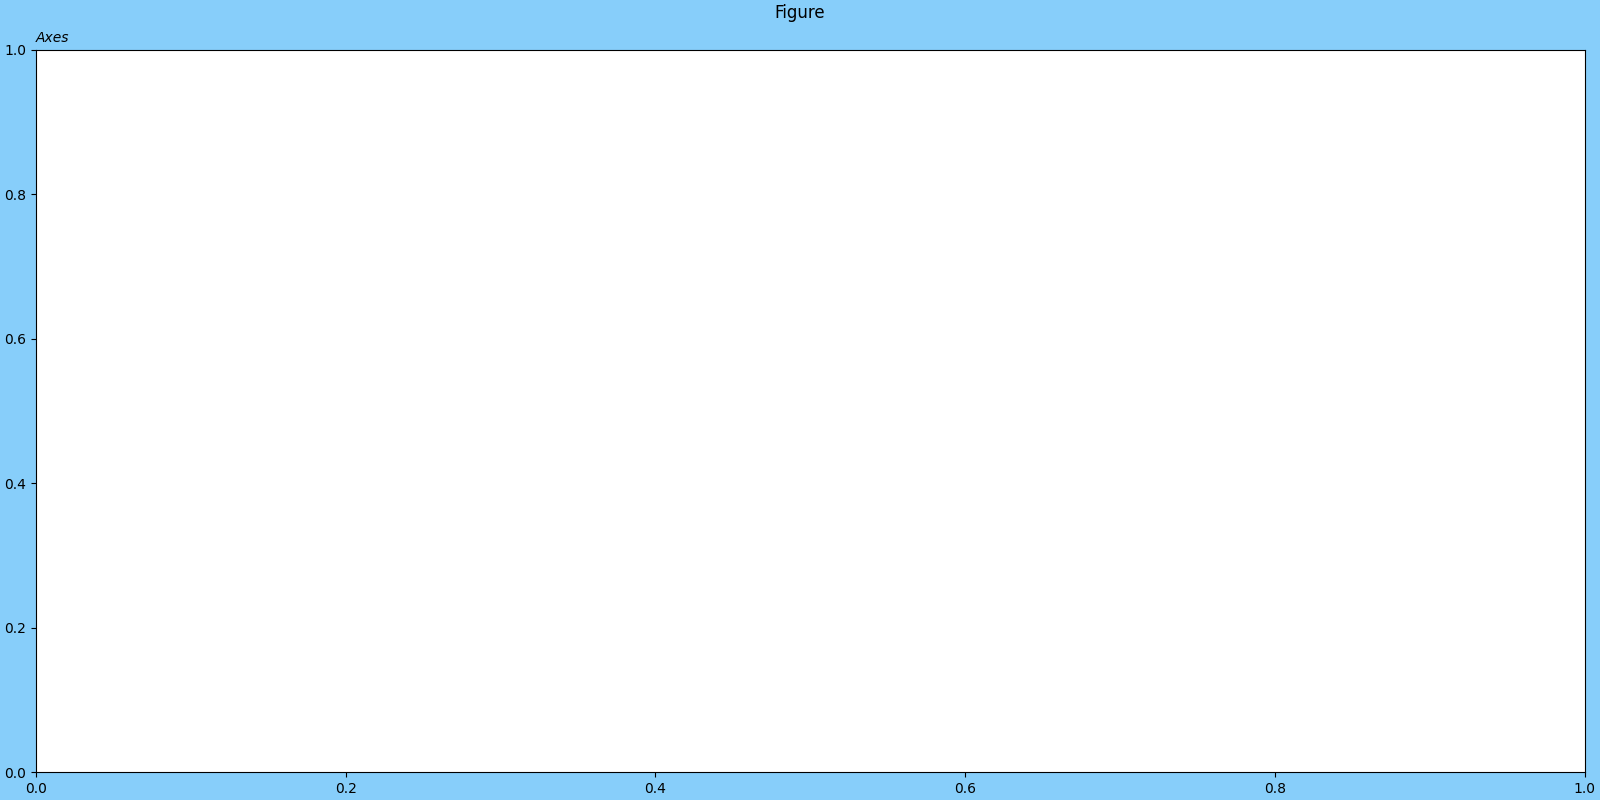

In [2]:
%matplotlib widget
fig = plt.figure(figsize=(16, 8), facecolor='lightskyblue', 
                 layout='constrained')
fig.suptitle('Figure')
ax = fig.add_subplot()
ax.set_title('Axes', loc='left', fontstyle='oblique', 
             fontsize='medium')
plt.show()

`%matplotlib inline` 则在代码框运行后渲染了一张静态图片并插入到输出框中：

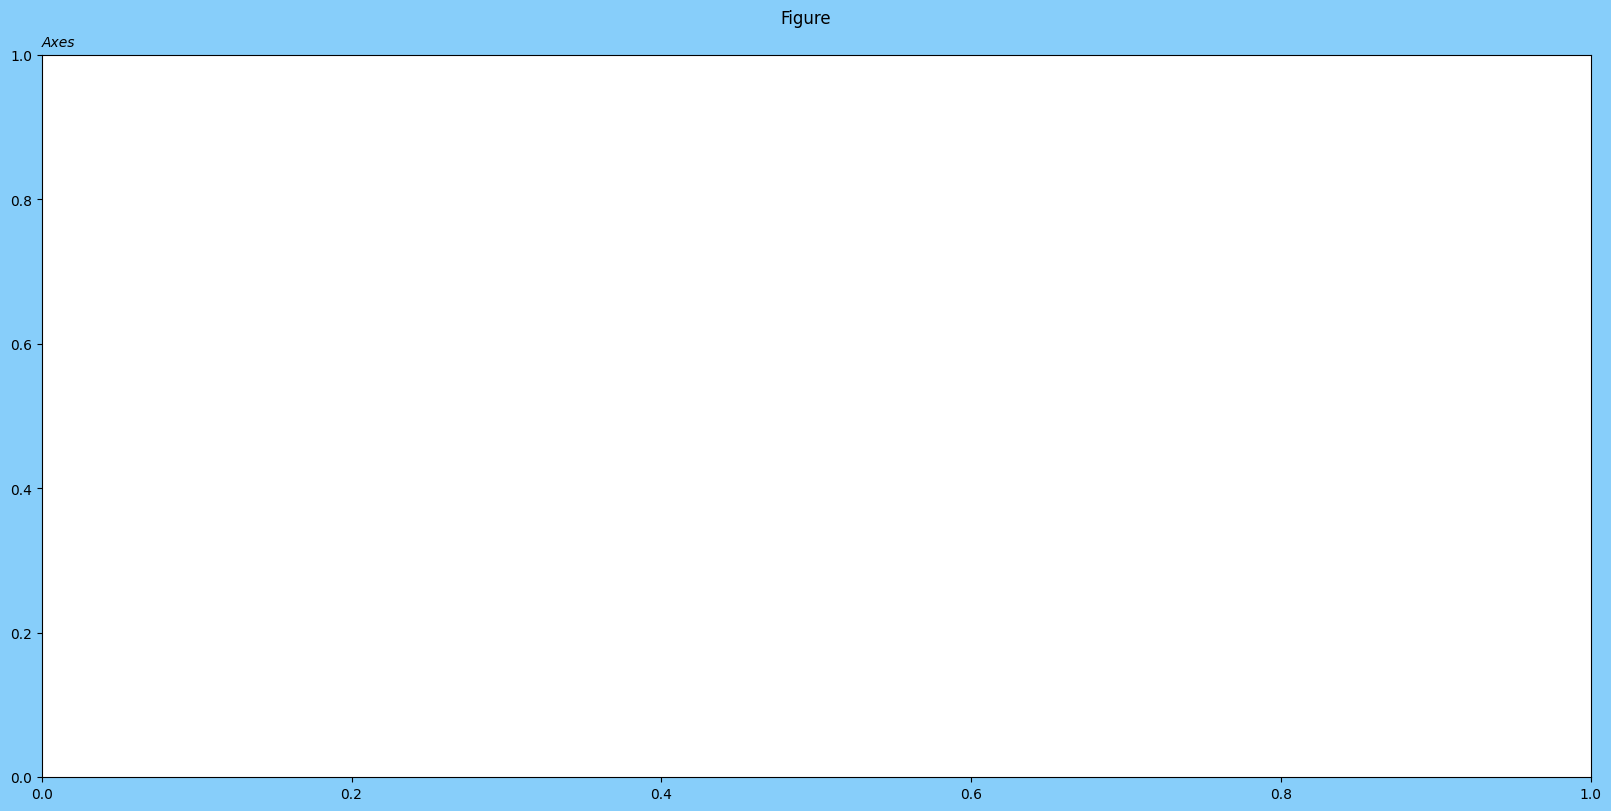

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(16, 8), facecolor='lightskyblue', 
                 layout='constrained')
fig.suptitle('Figure')
ax = fig.add_subplot()
ax.set_title('Axes', loc='left', fontstyle='oblique', 
             fontsize='medium')
plt.show()

# 如何创建 Figure

我们可以使用 `pyplot` 接口创建 Figure 实例。

```Python
class matplotlib.figure.Figure(figsize=None, dpi=None, *, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None, layout=None, **kwargs)
```
- `figsize`：图像尺寸，默认是 [6.4, 4.8]
- `dpi`：像素密度
- `facecolor`：图像的背景颜色
- `edgecolor`：图像边框的颜色
- `linewidth`：边框宽度
- `frameon`：默认为 True，是否渲染图像背景
- `layout`：图像布局，默认为 None。指定布局方式可以以最佳的方式渲染图像，例如可以避免坐标轴标签、刻度等元素重叠，但会带来显著的性能开销。`tight_layout` 和 `constrained_layout` 也是关于图像布局的参数，但官方文档不推荐使用，建议使用 `layout` 参数，可选布局方式有 `constrained`，`compressed`，`tight` 等

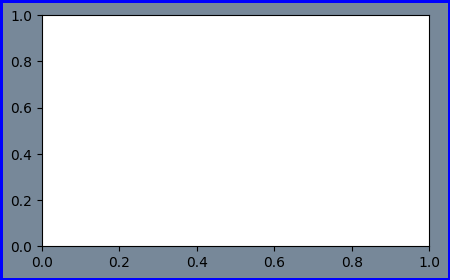

In [5]:
# 使用 facecolor，edgecolor 控制颜色显示
# 使用 linewidth 控制边框宽度
fig = plt.figure(figsize=(5,3), facecolor='lightslategray',
                 edgecolor='blue', linewidth=2.5)
ax = fig.add_subplot()

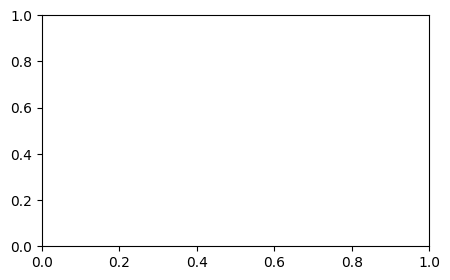

In [6]:
# frameon = False 则不渲染图像背景
fig = plt.figure(figsize=(5,3), facecolor='green',
                 edgecolor='red', linewidth=2.5,
                 frameon=False)
ax = fig.add_subplot()

## 常用方法

### `add_axes`

`add_axes(rect, projection=None, polar=False, **kwargs)`：添加坐标轴，返回 `Axes` 实例

- `rect`：坐标轴的尺寸（左边界、底边界、宽度、高度）。所有的数值都是相对于图形宽度和高度的分数。
- `projection`：数据空间（data space）向屏幕空间（screen space）的映射方式
    
> 在绘图中，数据通常以数据坐标系表示，而图形最终要显示在屏幕上，因此需要进行坐标变换。可分离变换是一种将坐标轴单独变换的方式，例如缩放、平移等。但有些情况下，需要进行非可分离变换，例如透视变换或非线性变换，这些变换无法简单地通过分别变换坐标轴来实现。`matplotlib.projections` 模块提供了处理这些非可分离变换的工具和方法，使用户能够实现各种复杂的数据到屏幕的映射，以满足绘图需求。这对于绘制具有非标准坐标系的图形或需要特殊变换的图形非常有用。

- `polar`：`polar=True` 等同于 `projection='ploar'`

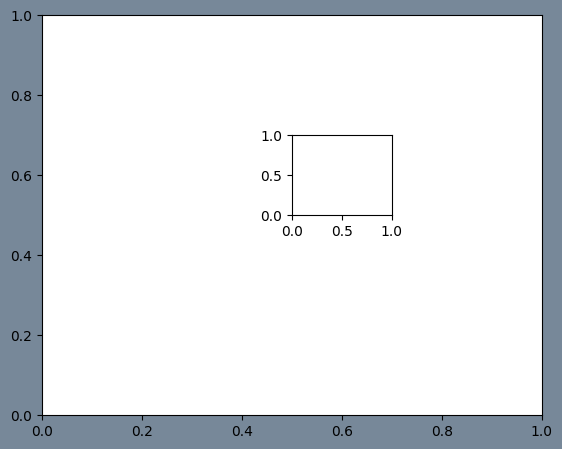

In [7]:
fig = plt.figure(figsize=(5,4), facecolor='lightslategray')
# [0, 0, 1, 1] 会铺满整个画布
ax = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.5, 0.5, 0.2, 0.2])

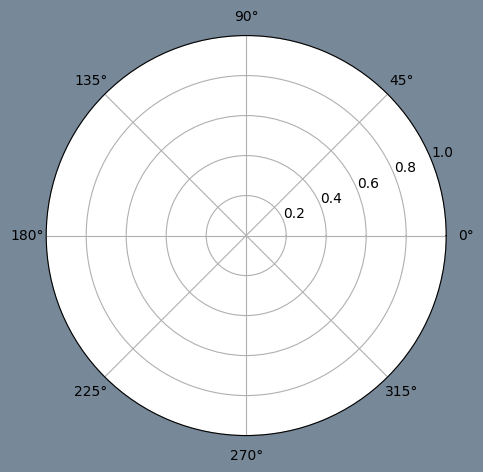

In [2]:
fig = plt.figure(figsize=(5,4), facecolor='lightslategray')
# polar = True，建立极坐标系
ax = fig.add_axes([0, 0, 1, 1], polar=True)

### `add_subplot`

`add_subplot(nrows, ncols, index, **kwargs)`：添加子图坐标轴，返回 `Axes` 实例

- `nrows`：子图总行数
- `ncols`：子图总列数
- `index`：子图位置
- `projection`：子图坐标系变换方式
- `sharex`，`sharey`：共享 x/y 轴，共享轴刻度、标签等坐标轴特征相同


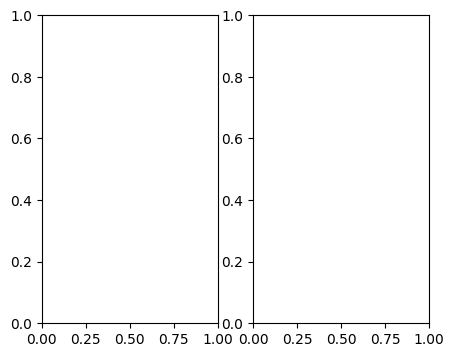

In [9]:
fig = plt.figure(figsize=(5,4))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

### `subplots`

`subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None)`：以 array 形式返回 `Axes` 实例

- squeeze：是否对返回的 `Axes` array 进行缩维处理。如果为 False，则 `subplots(1,1, squeeze=False)` 返回的也是一个 `Axes` array 

Text(0.5, 1.0, 'Sharing Y axis')

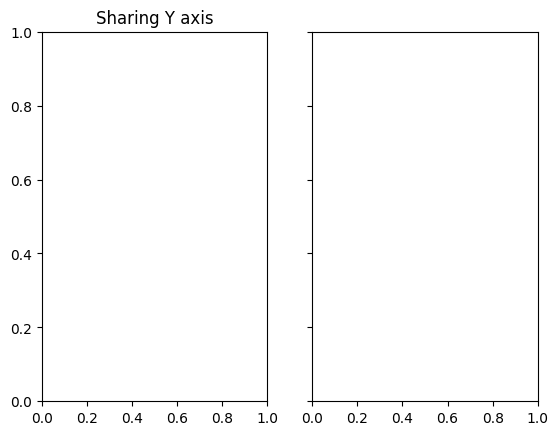

In [10]:
fig = plt.figure()

ax1, ax2 = fig.subplots(1, 2, sharey=True)
ax1.set_title('Sharing Y axis')

### `subplots_adjust`

`subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`：调节子图布局参数

- `left`：子图左边缘位置，表示为图片宽度的比例
- `right`：子图右边缘位置，表示为图片宽度的比例
- `bottom`：子图下边缘位置，表示为图片高度的比例
- `top`：子图上边缘位置，表示为图片高度的比例
- `wspace`：子图间 padding 的宽度，坐标轴平均宽度的比例 
- `hspace`：子图间 padding 的高度，坐标轴平均高度的比例

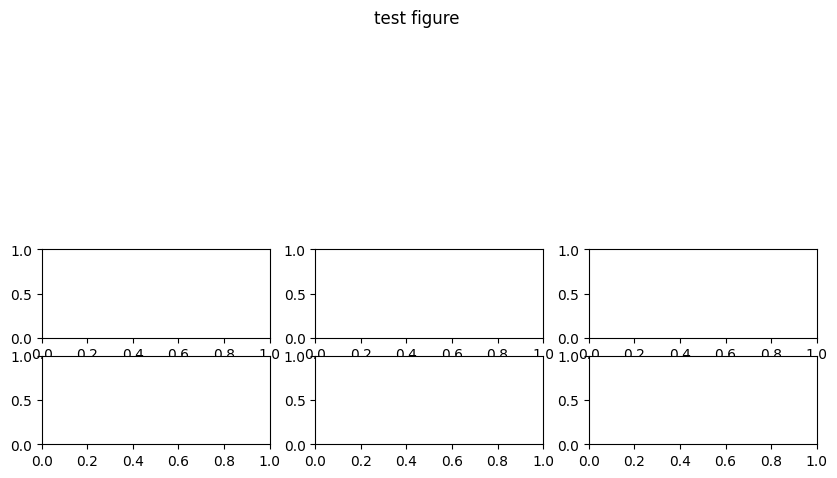

In [11]:
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(top=0.5)
fig.suptitle('test figure')

ax = fig.subplots(2,3)

### `suptitle`

`suptitle(t, **kwargs)`：为 Figure 实例添加一个标题，返回 `Text` 实例

- `t`：标题文字
- `x` 和 `y`：标题坐标
- `ha`：标题水平位置，center、left、right
- `va`：标题垂直位置，top、center、bottom、baseline
- `fontsize` 与 `fontweight`

Text(0.5, 0.98, 'test figure')

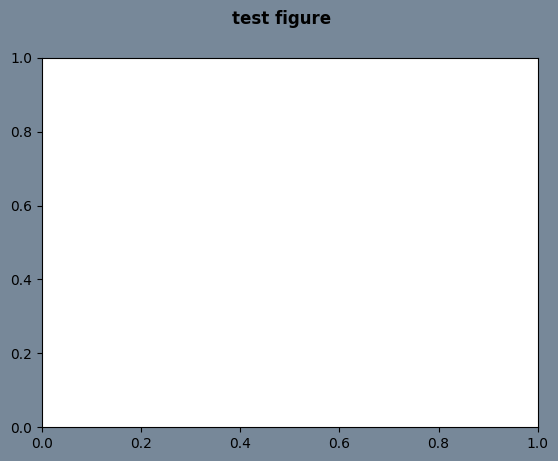

In [12]:
fig = plt.figure(facecolor='lightslategray')

ax = fig.add_subplot()
fig.suptitle('test figure', fontweight='bold')

### `tight_layout`

`tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)`：调节子图之间和周围的间距，可以使得子图显示更美观

- `pad`：图片边缘与子图边缘之间的 padding，以字体大小的比例表示，默认 1.08
- `h_pad` 和 `w_pad`：相邻子图边缘之间的填充（高度/宽度），默认为 `pad` 取值
- `rect`：tuple （left, bottom, right, top）， default: （0, 0, 1, 1）

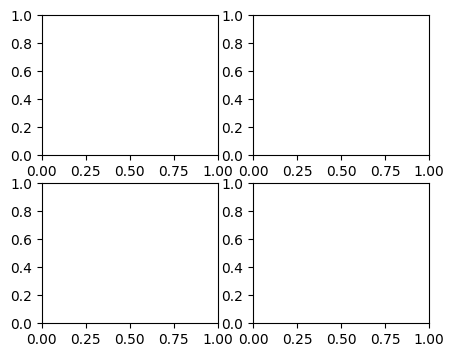

In [13]:
fig = plt.figure(figsize=(5,4))
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)

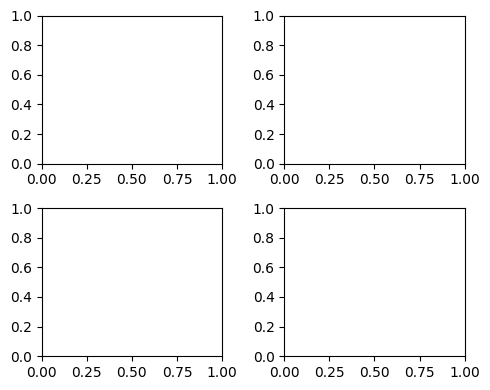

In [14]:
fig = plt.figure(figsize=(5,4))
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)
# 使用 tight_layout，子图布局更美观
fig.tight_layout()

当然，也可以在创建 Figure 实例时使用 `layout` 参数： 

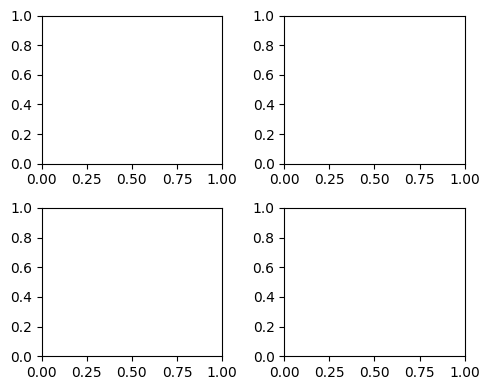

In [15]:
fig = plt.figure(figsize=(5,4), layout='tight')
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)

# 如何保存 Figure

matplotlib 提供了 `savefig` 方法来保存图片。 

```Python
savefig(fname, *, dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, **kwargs
       )
```

- `fname`：保存路径/文件名
- `dpi`：默认 `figure` 表示使用定义 `Figure` 实例时的像素
- `format`：默认保存为 png 格式
- `bbox_inches`：调整保存图片的尺寸，常用 `tight`，matplotlib 会尝试确定图形的紧凑边界框
- `pad_inches`：当 `bbox_inches` 设置为 `tight` 时，围绕图形的边缘的填充量，以英寸为单位

# 参考资料

- https://matplotlib.org/stable/users/explain/figure/figure_intro.html#introduction-to-figures  
- https://stackoverflow.com/questions/43326680/what-are-the-differences-between-add-axes-and-add-subplot